In [15]:
# import Librarytr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [16]:
# loading Data
data = pd.read_csv('california.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [17]:
# drop addrerss 
data = data.drop(['longitude'], axis=1)
data = data.drop(['latitude'], axis =1)
data.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


<Axes: >

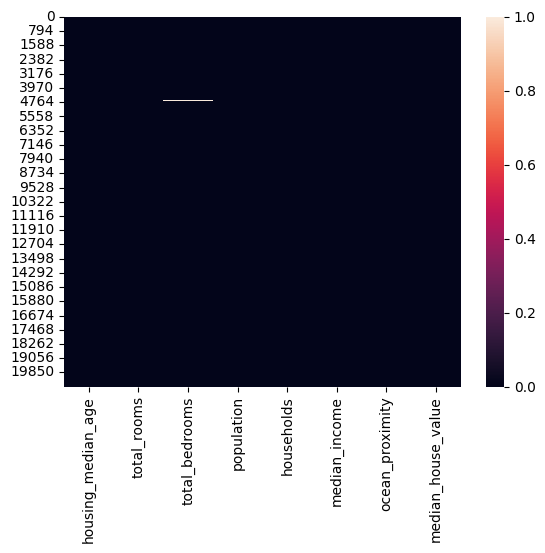

In [18]:
# check for missing data points
sns.heatmap(data.isnull())

<Axes: >

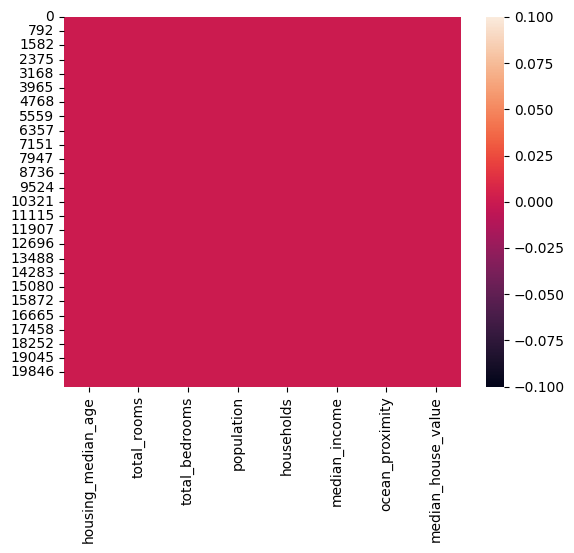

In [19]:
# drop null values
data.dropna(inplace=True)
sns.heatmap(data.isnull())

In [20]:
ocean = pd.get_dummies(data.ocean_proximity).astype(int)
data = data.join(ocean)
data = data.drop(['ocean_proximity'], axis=1)
data

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,25,1665,374.0,845,330,1.5603,78100,0,1,0,0,0
20636,18,697,150.0,356,114,2.5568,77100,0,1,0,0,0
20637,17,2254,485.0,1007,433,1.7000,92300,0,1,0,0,0
20638,18,1860,409.0,741,349,1.8672,84700,0,1,0,0,0


In [21]:
# train test split
X = data.drop(['median_house_value'], axis=1)
Y = data['median_house_value']


# train test data split into 30 70 ration
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

In [22]:
# creating model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [23]:
predictions = model.predict(X_test)

In [24]:
predictions

array([242292.24147895, 264075.63967584, 192997.19172706, ...,
       295755.55344163,  84759.09487635, 102710.3522599 ])

In [25]:
error = np.sqrt(metrics.mean_absolute_error(Y_test, predictions))

In [26]:
error

224.90941242222638

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have a dataset with features (X) and labels (y)
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, Y_train)






In [ ]:
# Make predictions
predictions = clf.predict(X_test)
predictions

In [ ]:
# Evaluate the accuracy
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy}")